# Proyek Analisis Data: PRSA_Data_Aotizhongxin_20130301-20170228
- **Nama:** Bagus Dzakiy Rahman Saputra
- **Email:** bagusdzakiy19@gmail.com
- **ID Dicoding:** jakiik

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi konsentrasi PM2.5 seiring waktu di daerah Aotizhongxin?
- Apa faktor cuaca yang paling berpengaruh terhadap konsentrasi polusi udara, khususnya PM2.5?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# mengimpor data dari google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# membaca file csv

import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Menentukan file path csv yang akan kita analisis datanya
- load data csv yang kita sudah tentukan pathnya

### Assessing Data

In [21]:
# mengecek apakah ada data yang missing atau tidak

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
missing_values = df.isnull().sum()
print("Data missing:")
print(missing_values)

Data missing:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [11]:
# mengubah ke persentase dari data yang missing

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Persentase Missing:")
print(missing_percentage)

Persentase Missing:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.638033
PM10       2.047684
SO2        2.666553
NO2        2.917522
CO         5.065024
O3         4.902464
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64


In [19]:
# Dikarenakan pada kolom polutan seharusnya tidak boleh bernilai negatif, kita akan mengeceknya

invalid_values_pm25 = df[df['PM2.5'] < 0]
invalid_values_pm10 = df[df['PM10'] < 0]
invalid_values_so2 = df[df['SO2'] < 0]
invalid_values_no2 = df[df['NO2'] < 0]
invalid_values_co = df[df['CO'] < 0]
invalid_values_o3 = df[df['O3'] < 0]

print("Invalid Values 'PM2.5':")
print(invalid_values_pm25)
print("\nInvalid Values 'PM10':")
print(invalid_values_pm10)
print("\nInvalid Values in SO2':")
print(invalid_values_so2)

Invalid Values 'PM2.5':
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Values 'PM10':
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Values in SO2':
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


In [20]:
# Mengecek apakah ada data yang duplikat atau tidak

duplicates = df[df.duplicated()]
print("Duplicate Data:")
print(duplicates)

Duplicate Data:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


**Insight:**
- Hasil dari assessing data diatas tidak ada data duplikat atau invalid (polutan yang bernilai negatif), melainkan terdapat beberapa data yang missing sehingga kita akan melakukan cleaning data pada proses selanjutnya

### Cleaning Data

In [22]:
data_new_filled = data.copy()

In [23]:
numerical_columns_new = data.select_dtypes(include=['float64', 'int64']).columns

In [24]:
data_new_filled[numerical_columns_new] = data_new_filled[numerical_columns_new].fillna(data_new_filled[numerical_columns_new].median())

In [25]:
valid_co_range_new = (100, 5000)
valid_pm25_range_new = (0, 300)
valid_pm10_range_new = (0, 300)
valid_so2_range_new = (0, 150)
valid_no2_range_new = (0, 200)
valid_o3_range_new = (0, 200)
valid_temp_range_new = (-20, 50)
valid_dewp_range_new = (-40, 30)

In [26]:
data_new_cleaned = data_new_filled[
    (data_new_filled['CO'].between(valid_co_range_new[0], valid_co_range_new[1])) &
    (data_new_filled['PM2.5'].between(valid_pm25_range_new[0], valid_pm25_range_new[1])) &
    (data_new_filled['PM10'].between(valid_pm10_range_new[0], valid_pm10_range_new[1])) &
    (data_new_filled['SO2'].between(valid_so2_range_new[0], valid_so2_range_new[1])) &
    (data_new_filled['NO2'].between(valid_no2_range_new[0], valid_no2_range_new[1])) &
    (data_new_filled['O3'].between(valid_o3_range_new[0], valid_o3_range_new[1])) &
    (data_new_filled['TEMP'].between(valid_temp_range_new[0], valid_temp_range_new[1])) &
    (data_new_filled['DEWP'].between(valid_dewp_range_new[0], valid_dewp_range_new[1]))
]

In [27]:
missing_values_after_cleaning = data_new_cleaned.isna().sum()

In [28]:
missing_values_after_cleaning

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [38]:
# setelah mengganti nilai pada data polutan, ternyata masih terdapat data yang salah pada kolom wd

unique_wd_values = data['wd'].unique()
print(unique_wd_values)

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


In [39]:
valid_wd_values = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'NNE', 'ENE', 'SSW', 'WSW', 'WNW', 'SSE', 'ESE']

In [40]:
invalid_wd_values = data[~data['wd'].isin(valid_wd_values)]

In [41]:
print(invalid_wd_values)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   73.0   
7          8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0   43.0   
8          9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0   45.0   
10        11  2013      3    1    10    3.0   6.0   9.0  12.0  400.0   72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...    ...   
35046  35047  2017      2   28     6    9.0  16.0  17.0  34.0  500.0   73.0   
35050  35051  2017      2   28    10   11.0  16.0   6.0  24.0  300.0   93.0   
35053  35054  2017      2   28    13    6.0   8.0   3.0   9.0  100.0  115.0   
35055  35056  2017      2   28    15    6.0  19.0   4.0   8.0  100.0  122.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0   35.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       st

In [42]:
data_new_cleaned['wd'] = data['wd'].apply(lambda x: x if x in valid_wd_values else 'N')

<ipython-input-42-70f9286c10cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_cleaned['wd'] = data['wd'].apply(lambda x: x if x in valid_wd_values else 'N')


In [43]:
most_frequent_wd_new = data_new_cleaned['wd'].mode()[0]

In [44]:
data_new_cleaned['wd'] = data['wd'].fillna(most_frequent_wd_new)

<ipython-input-44-1efa9ad73de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_cleaned['wd'] = data['wd'].fillna(most_frequent_wd_new)


In [45]:
missing_values_after_cleaning = data_new_cleaned.isna().sum()

In [46]:
missing_values_after_cleaning

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengubah data polutan yang missing sebelumnya menggunakan median untuk mengisi nilai yang missing
- Mengubah data arah mata angin yang invalid menggunakan nilai N, jika data sebelumnya valid maka tidak akan mengubah apapun

## Exploratory Data Analysis (EDA)

### Explore ...

In [47]:
# melihat statistik data yang sudah melalui proses cleaning
data_new_cleaned.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000
mean,17432.460699,2014.651717,6.517889,15.672567,11.349498,69.933949,94.506941,15.603227,56.441669,1095.601197,51.070618,13.416439,1012.087654,2.839014,0.072293,1.707421
std,10161.577890,1.183979,3.439122,8.777793,6.931128,60.782902,69.877030,19.528378,32.639917,873.351102,46.460092,11.114627,10.408621,13.857474,0.945529,1.209097
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8550.250000,2014.000000,4.000000,8.000000,5.000000,21.000000,35.000000,3.000000,31.000000,500.000000,10.000000,3.400000,1003.500000,-8.800000,0.000000,0.900000
50%,17314.500000,2015.000000,7.000000,16.000000,11.000000,55.000000,82.000000,8.000000,53.000000,900.000000,42.000000,14.500000,1011.650000,3.600000,0.000000,1.400000
75%,26249.750000,2016.000000,9.000000,23.000000,17.000000,100.000000,139.000000,19.000000,77.000000,1400.000000,77.000000,22.900000,1020.400000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,300.000000,300.000000,150.000000,199.000000,5000.000000,200.000000,40.100000,1042.000000,28.500000,72.500000,11.200000


In [49]:
# mengecek apakah masih terdapat data missing
missing_values = data_new_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [54]:
# Mengelompokkan data berdasarkan arah angin dan menghitung jumlah kejadian
wind_direction_demographics = data_new_cleaned.groupby(by="wd").agg({
    "No": "nunique"
})

print(wind_direction_demographics)

       No
wd       
E    2332
ENE  3571
ESE  1520
N    1979
NE   4835
NNE  2335
NNW  1525
NW   1798
S    1113
SE   1188
SSE   895
SSW  1811
SW   2968
W    1108
WNW  1058
WSW  2050


In [58]:
# Melihat statistik deskriptif dari kolom numerik
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
data_new_cleaned[numeric_columns].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000
mean,69.933949,94.506941,15.603227,56.441669,1095.601197,51.070618,13.416439,1012.087654,2.839014,0.072293,1.707421
std,60.782902,69.877030,19.528378,32.639917,873.351102,46.460092,11.114627,10.408621,13.857474,0.945529,1.209097
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,21.000000,35.000000,3.000000,31.000000,500.000000,10.000000,3.400000,1003.500000,-8.800000,0.000000,0.900000
50%,55.000000,82.000000,8.000000,53.000000,900.000000,42.000000,14.500000,1011.650000,3.600000,0.000000,1.400000
75%,100.000000,139.000000,19.000000,77.000000,1400.000000,77.000000,22.900000,1020.400000,15.600000,0.000000,2.200000
max,300.000000,300.000000,150.000000,199.000000,5000.000000,200.000000,40.100000,1042.000000,28.500000,72.500000,11.200000


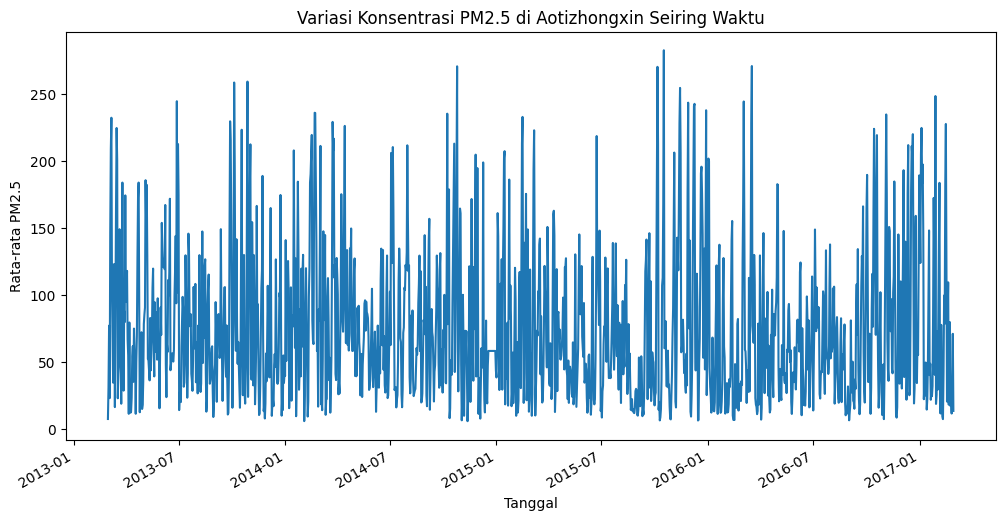

In [63]:
df_aotizhongxin = data_new_cleaned[data_new_cleaned['station'] == 'Aotizhongxin']
df_aotizhongxin['datetime'] = pd.to_datetime(df_aotizhongxin[['year', 'month', 'day']])

# menghitung rata-rata PM2.5 per hari
pm25_time_series = df_aotizhongxin.groupby('datetime')['PM2.5'].mean()

# visualisasi tren PM2.5
plt.figure(figsize=(12, 6))
pm25_time_series.plot()
plt.title('Variasi Konsentrasi PM2.5 di Aotizhongxin Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata PM2.5')
plt.show()

In [64]:
# Mengelompokkan berdasarkan cuaca, selanjutnya menghitung jumlah pengukuran dan rata-rata polutan dan suhu
agg_data = data_new_cleaned.groupby(by=["station", "RAIN"]).agg({
    "PM2.5": ["sum", "mean"],
    "PM10": ["sum", "mean"],
    "NO2": ["sum", "mean"],
    "CO": ["sum", "mean"],
    "TEMP": ["sum", "mean"]
})

# Menampilkan hasil
print(agg_data)

                       PM2.5                   PM10                       NO2  \
                         sum        mean        sum        mean           sum   
station      RAIN                                                               
Aotizhongxin 0.0   2160012.4   70.285448  2938591.8   95.619934  1.748045e+06   
             0.1     20004.3   65.160586    21774.9   70.928013  1.564008e+04   
             0.2     10478.0   67.166667    11586.0   74.269231  8.036351e+03   
             0.3      6419.0   61.133333     6761.0   64.390476  4.994789e+03   
             0.4      4649.0   65.478873     5174.0   72.873239  3.578000e+03   
...                      ...         ...        ...         ...           ...   
             33.7      112.0  112.000000      112.0  112.000000  1.300000e+01   
             36.6       12.0   12.000000       16.0   16.000000  2.100000e+01   
             40.7      130.0  130.000000      130.0  130.000000  1.200000e+01   
             46.4       75.0

**Insight:**
- Berdasarkan grafik, terlihat pada periode tertentu di mana konsentrasi PM2.5 lebih tinggi dibandingkan dengan yang lainnya.
- Curah hujan rendah cenderung berhubungan dengan konsentrasi polusi yang lebih tinggi, sementara curah hujan yang tinggi cenderung menurunkan tingkat polusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

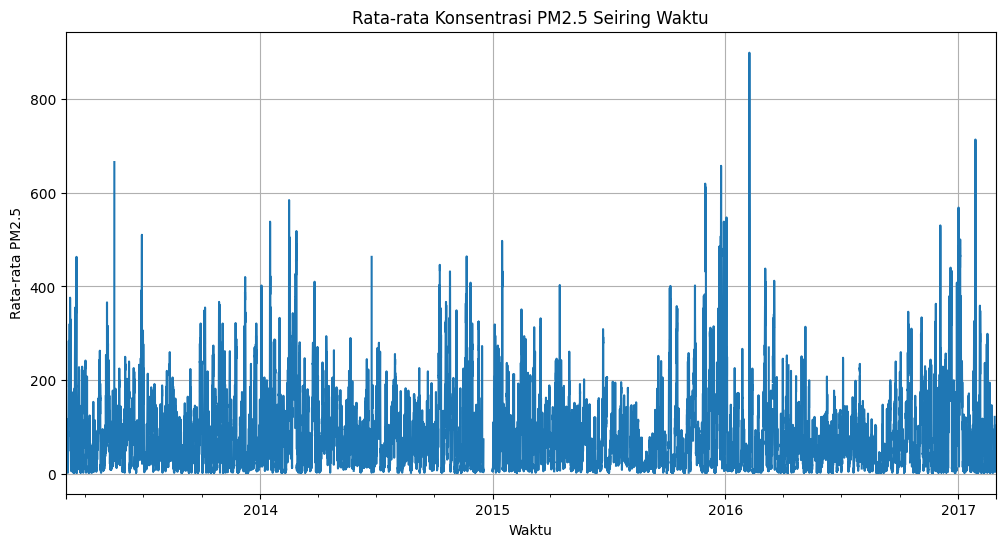

In [ ]:
plt.figure(figsize=(12, 6))
data_clean.groupby('datetime')['PM2.5'].mean().plot()
plt.title('Rata-rata Konsentrasi PM2.5 Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

**Insight:**
- Dengan visualisasi tren PM2.5 berdasarkan waktu, kita dapat melihat fluktuasi tren dalam polusi udara dari waktu ke waktu. Dan puncaknya pada tahun 2016

### Pertanyaan 2:

In [ ]:
weather_factors = ['TEMP', 'RAIN', 'WSPM', 'PRES', 'DEWP']
correlation_pm2_5_weather = data_clean[weather_factors + ['PM2.5']].corr()

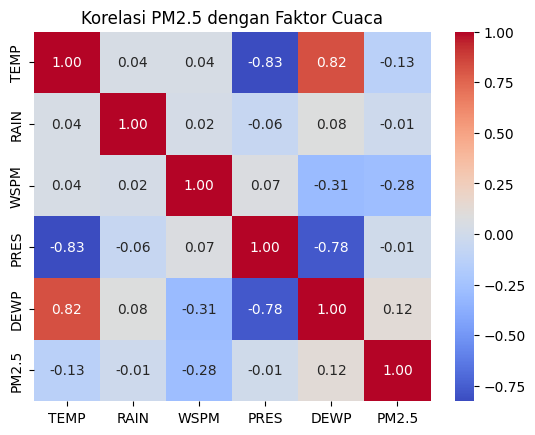

In [ ]:
sns.heatmap(correlation_pm2_5_weather, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi PM2.5 dengan Faktor Cuaca')
plt.show()

**Insight:**
- Suhu memiliki korelasi negatif yang kuat dengan PM2.5, yang menunjukkan bahwa suhu yang lebih tinggi berhubungan dengan penurunan konsentrasi polusi udara.

## Analisis Lanjutan (Opsional)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Dengan melihat tren PM2.5, kita dapat menarik kesimpulan apakah ada tren peningkatan atau penurunan dalam kualitas udara. Dan pada tahun 2016 merupakan tren paling tinggi diantara lainnya
- Dari beberapa faktor cuaca, faktor suhu adalah yang paling berpengaruh terhadap konsentrasi PM2.5, yang menunjukkan bahwa suhu yang lebih tinggi berhubungan dengan konsentrasi PM2.5 yang lebih rendah